In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

In [2]:
dir = r"C:\Users\kisho\Datasets\archive\dataset\training_set"
categories = ['cats','dogs']

In [3]:
for category in categories:
    folder = os.path.join(dir,category)
    print(folder)

C:\Users\kisho\Datasets\archive\dataset\training_set\cats
C:\Users\kisho\Datasets\archive\dataset\training_set\dogs


In [4]:
for category in categories:
    folder = os.path.join(dir,category)
    for image in os.listdir(folder):
        image_path = os.path.join(folder,image)
        print(image_path)
        break

C:\Users\kisho\Datasets\archive\dataset\training_set\cats\cat.1.jpg
C:\Users\kisho\Datasets\archive\dataset\training_set\dogs\dog.1.jpg


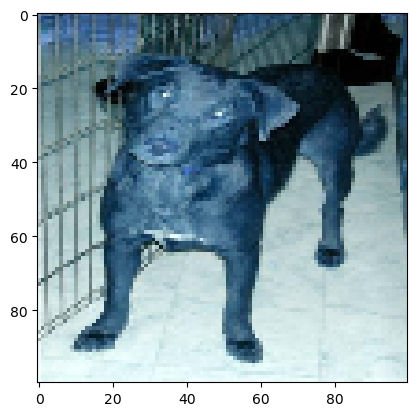

In [5]:
for category in categories:
    folder = os.path.join(dir,category)
    for image in os.listdir(folder):
        image_path = os.path.join(folder,image)
        image_arr = cv2.imread(image_path)
        image_arr = cv2.resize(image_arr,(100,100))
        plt.imshow(image_arr)
        break

In [6]:
data = []

for category in categories:
    folder = os.path.join(dir,category)
    label = categories.index(category)
    for image in os.listdir(folder):
        image_path = os.path.join(folder,image)
        image_arr = cv2.imread(image_path)
        image_arr = cv2.resize(image_arr,(100,100))
        data.append([image_arr, label])

In [7]:
len(data)

8000

In [8]:
random.shuffle(data)

In [9]:
x = []
y = []
for feature, label in data:
    x.append(feature)
    y.append(label)

In [10]:
print(len(x), len(y))

8000 8000


In [11]:
x = np.array(x)
y = np.array(y)

In [12]:
y

array([1, 0, 1, ..., 1, 0, 0])

In [13]:
x[0]

array([[[164, 157, 154],
        [165, 158, 155],
        [165, 158, 155],
        ...,
        [172, 165, 162],
        [174, 167, 164],
        [173, 166, 163]],

       [[164, 157, 154],
        [165, 158, 155],
        [165, 158, 155],
        ...,
        [174, 167, 164],
        [176, 169, 166],
        [175, 168, 165]],

       [[166, 159, 156],
        [166, 159, 156],
        [167, 160, 157],
        ...,
        [176, 169, 166],
        [176, 169, 166],
        [177, 170, 167]],

       ...,

       [[128, 129, 127],
        [130, 131, 129],
        [138, 139, 137],
        ...,
        [ 79,  91, 101],
        [ 70,  82,  92],
        [ 70,  82,  92]],

       [[114, 115, 113],
        [123, 124, 122],
        [127, 128, 126],
        ...,
        [ 78,  87,  97],
        [ 77,  86,  96],
        [ 76,  85,  95]],

       [[117, 117, 117],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [ 71,  81,  91],
        [ 74,  84,  94],
        [ 77,  87,  97]]

In [14]:
x = x/255

In [15]:
x[0]

array([[[0.64313725, 0.61568627, 0.60392157],
        [0.64705882, 0.61960784, 0.60784314],
        [0.64705882, 0.61960784, 0.60784314],
        ...,
        [0.6745098 , 0.64705882, 0.63529412],
        [0.68235294, 0.65490196, 0.64313725],
        [0.67843137, 0.65098039, 0.63921569]],

       [[0.64313725, 0.61568627, 0.60392157],
        [0.64705882, 0.61960784, 0.60784314],
        [0.64705882, 0.61960784, 0.60784314],
        ...,
        [0.68235294, 0.65490196, 0.64313725],
        [0.69019608, 0.6627451 , 0.65098039],
        [0.68627451, 0.65882353, 0.64705882]],

       [[0.65098039, 0.62352941, 0.61176471],
        [0.65098039, 0.62352941, 0.61176471],
        [0.65490196, 0.62745098, 0.61568627],
        ...,
        [0.69019608, 0.6627451 , 0.65098039],
        [0.69019608, 0.6627451 , 0.65098039],
        [0.69411765, 0.66666667, 0.65490196]],

       ...,

       [[0.50196078, 0.50588235, 0.49803922],
        [0.50980392, 0.51372549, 0.50588235],
        [0.54117647, 0

In [16]:
x.shape

(8000, 100, 100, 3)

# Modelling

In [17]:
# pip install keras
# pip install tensorflow

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [19]:
model = Sequential()

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu'))
model.add(Dense(2,  activation = 'softmax'))

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=5)

Epoch 1/5
250/250 [==============================] - 258s 1s/step - loss: 0.7198 - accuracy: 0.5408
Epoch 2/5
250/250 [==============================] - 212s 849ms/step - loss: 0.6314 - accuracy: 0.6324
Epoch 3/5
250/250 [==============================] - 165s 662ms/step - loss: 0.5514 - accuracy: 0.7156
Epoch 4/5
250/250 [==============================] - 182s 727ms/step - loss: 0.4667 - accuracy: 0.7765
Epoch 5/5
250/250 [==============================] - 201s 804ms/step - loss: 0.3985 - accuracy: 0.8175


# testing

In [38]:
dir = r"C:\Users\kisho\Datasets\archive\dataset\test_set"
categories = ['cats','dogs']

In [39]:
testing_data = []

for category in categories:
    folder = os.path.join(dir,category)
    label = categories.index(category)
    for image in os.listdir(folder):
        image_path = os.path.join(folder,image)
        image_arr = cv2.imread(image_path)
        image_arr = cv2.resize(image_arr,(100,100))
        testing_data.append([image_arr, label])

In [40]:
random.shuffle(testing_data)

In [41]:
x_test = []
y_test = []
for feature, label in testing_data:
    x_test.append(feature)
    y_test.append(label)

In [42]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [43]:
x_test = x_test/255

In [44]:
x_test

array([[[[0.07058824, 0.2745098 , 0.45882353],
         [0.09411765, 0.29411765, 0.48627451],
         [0.10980392, 0.30980392, 0.50196078],
         ...,
         [0.18823529, 0.41960784, 0.61176471],
         [0.2       , 0.42745098, 0.63137255],
         [0.18431373, 0.41176471, 0.61568627]],

        [[0.10196078, 0.31372549, 0.52941176],
         [0.09411765, 0.30196078, 0.5254902 ],
         [0.10588235, 0.31764706, 0.5372549 ],
         ...,
         [0.18039216, 0.41960784, 0.59215686],
         [0.12941176, 0.36078431, 0.54509804],
         [0.10980392, 0.34117647, 0.52156863]],

        [[0.12156863, 0.30980392, 0.45882353],
         [0.13333333, 0.31764706, 0.46666667],
         [0.13333333, 0.31764706, 0.46666667],
         ...,
         [0.05490196, 0.21176471, 0.36470588],
         [0.08235294, 0.21568627, 0.38431373],
         [0.07843137, 0.21176471, 0.38039216]],

        ...,

        [[0.25098039, 0.5254902 , 0.73333333],
         [0.2       , 0.4745098 , 0.68627451]

In [45]:
y_pred = model.predict(x_test)

63/63 [==============================] - 13s 208ms/step


In [46]:
y_test

array([1, 1, 1, ..., 0, 0, 1])

In [47]:
y_pred

array([[0.54817766, 0.45182228],
       [0.64802516, 0.3519748 ],
       [0.12625764, 0.87374234],
       ...,
       [0.9757019 , 0.02429803],
       [0.57472014, 0.42527986],
       [0.7401924 , 0.25980756]], dtype=float32)

In [48]:
y_pred[0].argmax()

0

In [49]:
y_pred = np.argmax(y_pred, axis=1)

In [50]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.76      0.76      0.76      1000

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



In [53]:
accuracy_score(y_test,y_pred)

0.7605

In [54]:
confusion_matrix(y_test,y_pred)

array([[759, 241],
       [238, 762]], dtype=int64)